In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Open the citys data file
city = os.path.join("generated_data", "city_data.csv")
city_df = pd.read_csv(city)
city_df.head()

,city,driver_count,type
0,Davisberg,2,Urban
1,East Joshua,16,Urban
2,Port Jennytown,43,Urban
3,West Jessicamouth,24,Urban
4,Cartertown,72,Urban


In [3]:
# Open the ride data file
ride = os.path.join("generated_data", "ride_data.csv")
ride_df = pd.read_csv(ride)
ride_df.head()

,city,date,fare,ride_id
0,Bergermouth,2018-01-20 01:01:28,43.02,683665871149
1,West Jessicamouth,2018-01-14 11:34:08,6.52,5409319008083
2,Karatown,2018-01-10 12:01:16,22.33,9240161770669
3,Port Ann,2018-01-14 22:27:10,40.23,6581910956754
4,Markchester,2018-02-15 07:23:25,4.26,8481316754252


In [4]:
# Average fares by city
average_fare = ride_df.groupby(["city"])['fare'].mean().reset_index()
total_fare = ride_df.groupby(["city"])['fare'].sum().reset_index()
# Merge into city data table
city_df = city_df.merge(average_fare, on = 'city', how = "outer")
city_df = city_df.merge(total_fare, on = 'city', how = "outer")

city_df.head()

,city,driver_count,type,fare_x,fare_y
0,Davisberg,2,Urban,26.743043,615.09
1,East Joshua,16,Urban,24.764000,495.28
2,Port Jennytown,43,Urban,20.618696,474.23
3,West Jessicamouth,24,Urban,18.545238,389.45
4,Cartertown,72,Urban,24.591935,762.35


In [5]:
# Total rider per city
total_rides = ride_df.groupby(["city"])['date'].count().reset_index()
total_rides.rename_axis({'rider_id' : 'Rider Count'}, axis=1, inplace=True)

# Merge into city data table
city_df = city_df.merge(total_rides, on = 'city', how = "outer")
city_df = city_df.rename(columns={"date": "Ride Count",
                                 "city": "City",
                                 "driver_count": "Driver Count",
                                 "type": "City Type",
                                 "fare_x": "Average Fare",
                                 "fare_y": "Total Fares"})
city_df.head()

,City,Driver Count,City Type,Average Fare,Total Fares,Ride Count
0,Davisberg,2,Urban,26.743043,615.09,23
1,East Joshua,16,Urban,24.764000,495.28,20
2,Port Jennytown,43,Urban,20.618696,474.23,23
3,West Jessicamouth,24,Urban,18.545238,389.45,21
4,Cartertown,72,Urban,24.591935,762.35,31


In [6]:
# Set parameters for pie charts
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0.1, 0.1)

In [7]:
# Get data for % of Total Fares by City Type
city_types = city_df.groupby(["City Type"])["Total Fares"].sum().reset_index()
city_types

,City Type,Total Fares
0,Rural,4452.41
1,Suburban,19054.47
2,Urban,40506.11


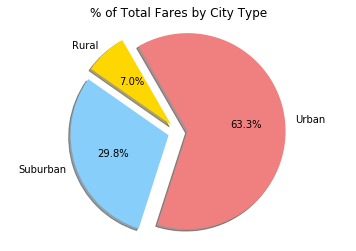

In [8]:
# Create pie chart for % of Total Fares by City Type
plt.title("% of Total Fares by City Type")
plt.pie(city_types["Total Fares"], explode=explode, labels=city_types["City Type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [9]:
# Get data for % of Total Rides by City Type
city_types = city_df.groupby(["City Type"])["Ride Count"].sum().reset_index()
city_types

,City Type,Ride Count
0,Rural,125
1,Suburban,625
2,Urban,1667


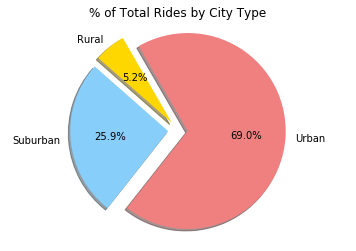

In [10]:
# Create pie chart for % of Total Rides by City Type
plt.title("% of Total Rides by City Type")
plt.pie(city_types["Ride Count"], explode=explode, labels=city_types["City Type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [11]:
# Get data for % of Total Drivers by City Type
city_types = city_df.groupby(["City Type"])["Driver Count"].sum().reset_index()
city_types

,City Type,Driver Count
0,Rural,110
1,Suburban,610
2,Urban,2151


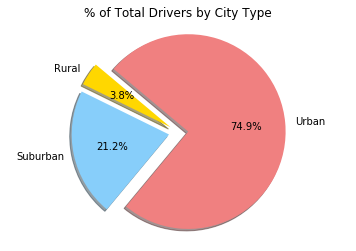

In [12]:
# Create pie chart for % of Total Drivers by City Type
plt.title("% of Total Drivers by City Type")
plt.pie(city_types["Driver Count"], explode=explode, labels=city_types["City Type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

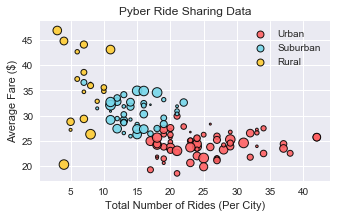

In [15]:
# Bubble Chart
# Set gray grid
seaborn.set(style='darkgrid')
# Set data for plot colors
_types= ['Urban', 'Suburban', 'Rural']

# Set palette - color names do not match but the actual colors are close
pal = dict(Rural = "#FFCC33", Suburban = "#76D7EA", Urban = "#ff6163")


fg = seaborn.FacetGrid(data=city_df, hue='City Type', palette=pal, hue_order=_types, aspect=1.61)
fg.map(plt.scatter, 'Ride Count', 'Average Fare', 
       s=city_df["Driver Count"]*1.3, alpha=0.9, edgecolors="black", linewidth=1) # .add_legend()

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data')
plt.legend()
plt.show()